Extracting EDF parameters from /home/ruilin/Desktop/ECE9063/Final/sub-150_ses-001_task-stim_run-01_ieeg_edited_GVE_filtered5.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 5191167  =      0.000 ...  2534.750 secs...
Using matplotlib as 2D backend.


/tmp/ipykernel_250880/3491867550.py:5: RuntimeWarning: Omitted 3 annotation(s) that were outside data range.
  raw = mne.io.read_raw_edf(file_path, preload=True)


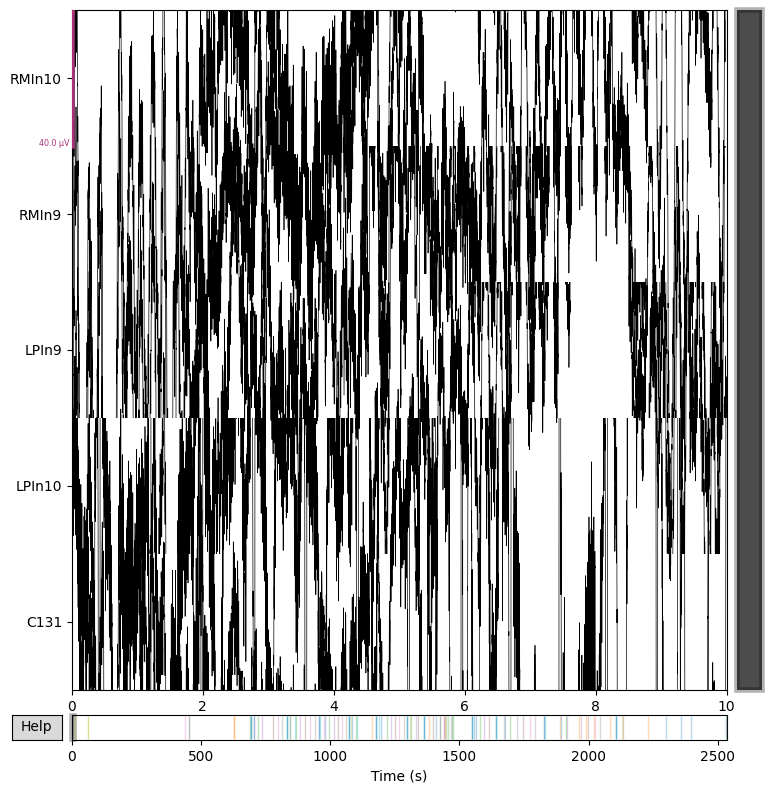

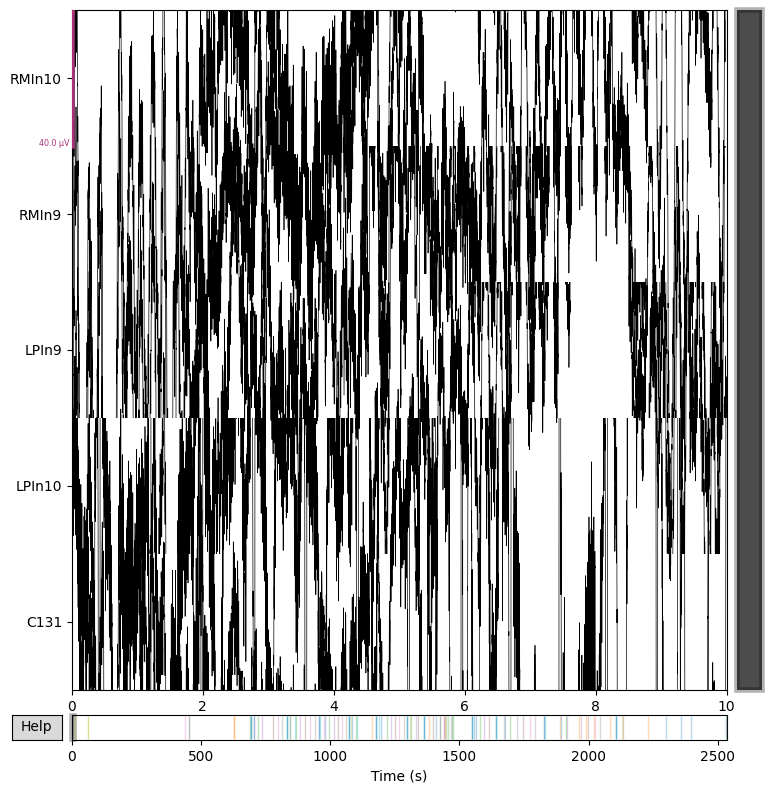

In [2]:
import matplotlib.pyplot as plt
import mne

file_path = 'sub-150_ses-001_task-stim_run-01_ieeg_edited_GVE_filtered5.edf'
raw = mne.io.read_raw_edf(file_path, preload=True)
raw.plot() 

In [2]:
low_freq, high_freq = 30, 100  # Define frequency band for gamma oscillations
raw_filtered = raw.copy().filter(l_freq=low_freq, h_freq=high_freq)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 30 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 30.00
- Lower transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 26.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 903 samples (0.441 s)



In [3]:
# Extract data from the desired channel
data, times = raw[:]
# channel_idx = 4  # Index of the channel to analyze (e.g., LPIn9)
signal0 = data[0]
signal1 = data[1]
signal2 = data[2]
signal3 = data[3]
signal4 = data[4]

In [4]:
from scipy.signal import find_peaks

# Find peaks in the signal
# The distance parameter ensures a minimum interval between peaks to avoid false detections
peaks0, properties0 = find_peaks(signal0, height=0.0001, distance=int(raw.info['sfreq'] * 0.6))
peaks1, properties1 = find_peaks(signal1, height=0.0001, distance=int(raw.info['sfreq'] * 0.6))
peaks2, properties2 = find_peaks(signal2, height=0.0001, distance=int(raw.info['sfreq'] * 0.6))
peaks3, properties3 = find_peaks(signal3, height=0.0001, distance=int(raw.info['sfreq'] * 0.6))
peaks4, properties4 = find_peaks(signal4, height=0.0001, distance=int(raw.info['sfreq'] * 0.6))

# Plot the signal and the detected peaks
# import matplotlib.pyplot as plt

# plt.figure(figsize=(12, 6))
# plt.plot(times, signal, label='Filtered Signal')
# plt.plot(times[peaks], signal[peaks], 'rx', label='Detected Peaks')
# plt.xlabel('Time (s)')
# plt.ylabel('Amplitude (µV)')
# plt.title(f'Peak Detection in EEG Signal - Channel: {raw.ch_names[channel_idx]}')
# plt.legend()
# plt.show()


In [5]:
import numpy as np
# Calculate the R-R intervals (in seconds)
rr_intervals_LPIn9 = np.diff(peaks0) / raw.info['sfreq']
rr_intervals_LPIn10 = np.diff(peaks1) / raw.info['sfreq']
rr_intervals_RMIn9 = np.diff(peaks2) / raw.info['sfreq']
rr_intervals_RMIn10 = np.diff(peaks3) / raw.info['sfreq']
rr_intervals_C131 = np.diff(peaks4) / raw.info['sfreq']

# Plot R-R intervals
# plt.figure(figsize=(10, 4))
# plt.plot(rr_intervals, marker='o', linestyle='-')
# plt.xlabel('Interval Number')
# plt.ylabel('R-R Interval (s)')
# plt.title(f'R-R Intervals for Channel: {raw.ch_names[channel_idx]}')
# plt.grid(True)
# plt.show()

# Display R-R intervals
# for i, interval in enumerate(rr_intervals, 1):
#     print(f'Interval {i}: {interval:.4f} seconds')


In [6]:
rr_intervals_dict = {
    'LPIn9': rr_intervals_LPIn9,
    'LPIn10': rr_intervals_LPIn10,
    'RMIn9': rr_intervals_RMIn9,
    'RMIn10': rr_intervals_RMIn10,
    'C131': rr_intervals_C131
}

# Calculate summary statistics for each channel
summary_stats = {}
for channel, rr_intervals in rr_intervals_dict.items():
    stats = {
        'mean': np.mean(rr_intervals),
        'variance': np.var(rr_intervals),
        'std_dev': np.std(rr_intervals)
    }
    summary_stats[channel] = stats

# Print summary statistics
for channel, stats in summary_stats.items():
    print(f'Channel: {channel}')
    print(f"  Mean R-R Interval: {stats['mean']:.4f} seconds")
    print(f"  Variance: {stats['variance']:.4f}")
    print(f"  Standard Deviation: {stats['std_dev']:.4f}\n")

Channel: LPIn9
  Mean R-R Interval: 1.3707 seconds
  Variance: 5.0168
  Standard Deviation: 2.2398

Channel: LPIn10
  Mean R-R Interval: 1.2884 seconds
  Variance: 3.0953
  Standard Deviation: 1.7593

Channel: RMIn9
  Mean R-R Interval: 1.4776 seconds
  Variance: 6.9886
  Standard Deviation: 2.6436

Channel: RMIn10
  Mean R-R Interval: 1.5937 seconds
  Variance: 8.9343
  Standard Deviation: 2.9890

Channel: C131
  Mean R-R Interval: 0.7644 seconds
  Variance: 0.0281
  Standard Deviation: 0.1676



In [7]:
# Assuming rr_intervals_dict stores R-R intervals for each channel as arrays
# Truncate all R-R intervals to the first 50 values
truncated_rr_intervals = {
    channel: rr[0:50] for channel, rr in rr_intervals_dict.items() if len(rr) >= 50
}

# Create a DataFrame for correlation analysis
rr_intervals_df = pd.DataFrame(truncated_rr_intervals)

# Calculate the correlation matrix
correlation_matrix = rr_intervals_df.corr()

# Display the correlation matrix
print("Correlation Matrix (First 50 R-R Intervals):")
print(correlation_matrix)


Correlation Matrix (First 50 R-R Intervals):
           LPIn9    LPIn10     RMIn9    RMIn10      C131
LPIn9   1.000000 -0.082249  0.323459 -0.047022 -0.081796
LPIn10 -0.082249  1.000000 -0.006943  0.012730  0.039375
RMIn9   0.323459 -0.006943  1.000000  0.040498 -0.054466
RMIn10 -0.047022  0.012730  0.040498  1.000000 -0.103177
C131   -0.081796  0.039375 -0.054466 -0.103177  1.000000


In [15]:
# rr_intervals_LPIn9[:10]
# rr_intervals_LPIn10[:10]
# rr_intervals_RMIn9[:10]
# rr_intervals_RMIn10[:10]
# rr_intervals_C131[:10]

# Display R-R intervals
# for i, interval in enumerate(rr_intervals_LPIn9, 1):
#     print(f'Interval {i} : {interval:.4f} seconds')
# for i, interval in enumerate(rr_intervals_LPIn10, 1):
#     print(f'Interval {i}: {interval:.4f} seconds')
# for i, interval in enumerate(rr_intervals_RMIn9, 1):
#     print(f'Interval {i}: {interval:.4f} seconds')
# for i, interval in enumerate(rr_intervals_RMIn10, 1):
#     print(f'Interval {i}: {interval:.4f} seconds')
# for i, interval in enumerate(rr_intervals_C131, 1):
#     print(f'Interval {i}: {interval:.4f} seconds')

Variance for every 50 R-R Intervals (Truncated Data):
        LPIn9     LPIn10      RMIn9     RMIn10      C131
0    0.664525   3.940446   2.077174   4.356843  0.027944
1    8.049937   7.126359   9.864392   6.425077  0.001541
2    3.090894   0.041135   0.035012   2.010347  0.285593
3    1.280088   0.631132   1.598466   0.136092  0.539434
4    0.927366   0.479625  33.148306  17.591647  0.018895
5    1.048715   0.084910  22.698808  40.167096  0.009662
6   16.352043   0.646389   7.079507  17.331155  0.001779
7    5.847092  11.557218   6.286800   8.746603  0.000204
8    4.459484   2.268087   1.328389   2.900462  0.001054
9    7.661380   0.923123   1.207488   0.845574  0.000571
10   5.277664   2.987644   2.669901   1.537948  0.022620
11   1.012531   2.501805   0.480988   5.931392  0.000637
12   2.960133   3.170672   1.931688   4.641691  0.000771
13   0.391373   0.048014   4.563827   8.149056  0.020375
14   5.998427   1.976080   1.718794   2.780654  0.001583
15   0.250730   3.916665  16.74561

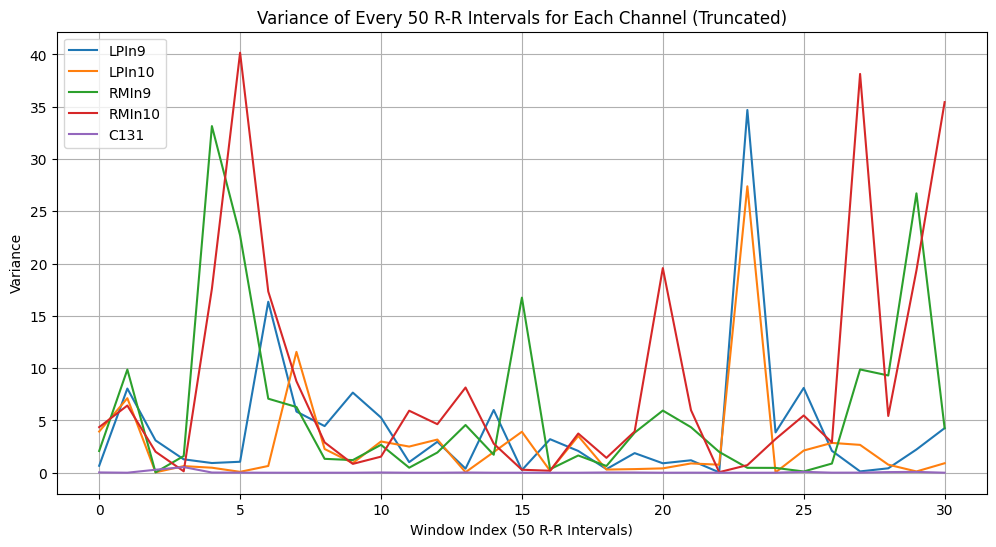

In [19]:
# Assuming rr_intervals_dict stores R-R intervals for each channel as arrays

# Step 1: Truncate all R-R intervals to the minimum length
min_length = min(len(rr) for rr in rr_intervals_dict.values())
truncated_rr_intervals = {
    channel: rr[:min_length] for channel, rr in rr_intervals_dict.items()
}

# Step 2: Function to calculate variance for each sliding window of 50 R-R intervals
def calculate_variances(rr_intervals, window_size=50):
    variances = []
    for i in range(0, len(rr_intervals) - window_size + 1, window_size):
        window = rr_intervals[i:i + window_size]
        var = np.var(window)
        variances.append(var)
    return variances

# Step 3: Calculate variances for every 50 R-R intervals for each truncated channel
variances_dict = {}
for channel, rr_intervals in truncated_rr_intervals.items():
    variances_dict[channel] = calculate_variances(rr_intervals)

# Create a DataFrame for variance analysis
variances_df = pd.DataFrame(variances_dict)

# Print the variances DataFrame
print("Variance for every 50 R-R Intervals (Truncated Data):")
print(variances_df)

# Step 4: Plotting the variances for each channel
plt.figure(figsize=(12, 6))
for channel in variances_df.columns:
    plt.plot(variances_df.index, variances_df[channel], label=channel)

plt.xlabel('Window Index (50 R-R Intervals)')
plt.ylabel('Variance')
plt.title('Variance of Every 50 R-R Intervals for Each Channel (Truncated)')
plt.legend()
plt.grid(True)
plt.show()

In [21]:
# Calculate the correlation matrix for the variance values across different channels
correlation_matrix_variances = variances_df.corr()

# Display the correlation matrix
print("Correlation Matrix of Variances (Every 50 R-R Intervals):")
print(correlation_matrix_variances)


Correlation Matrix of Variances (Every 50 R-R Intervals):
           LPIn9    LPIn10     RMIn9    RMIn10      C131
LPIn9   1.000000  0.804392 -0.189456 -0.127602 -0.111658
LPIn10  0.804392  1.000000 -0.136650 -0.172098 -0.150833
RMIn9  -0.189456 -0.136650  1.000000  0.533704 -0.090885
RMIn10 -0.127602 -0.172098  0.533704  1.000000 -0.167054
C131   -0.111658 -0.150833 -0.090885 -0.167054  1.000000


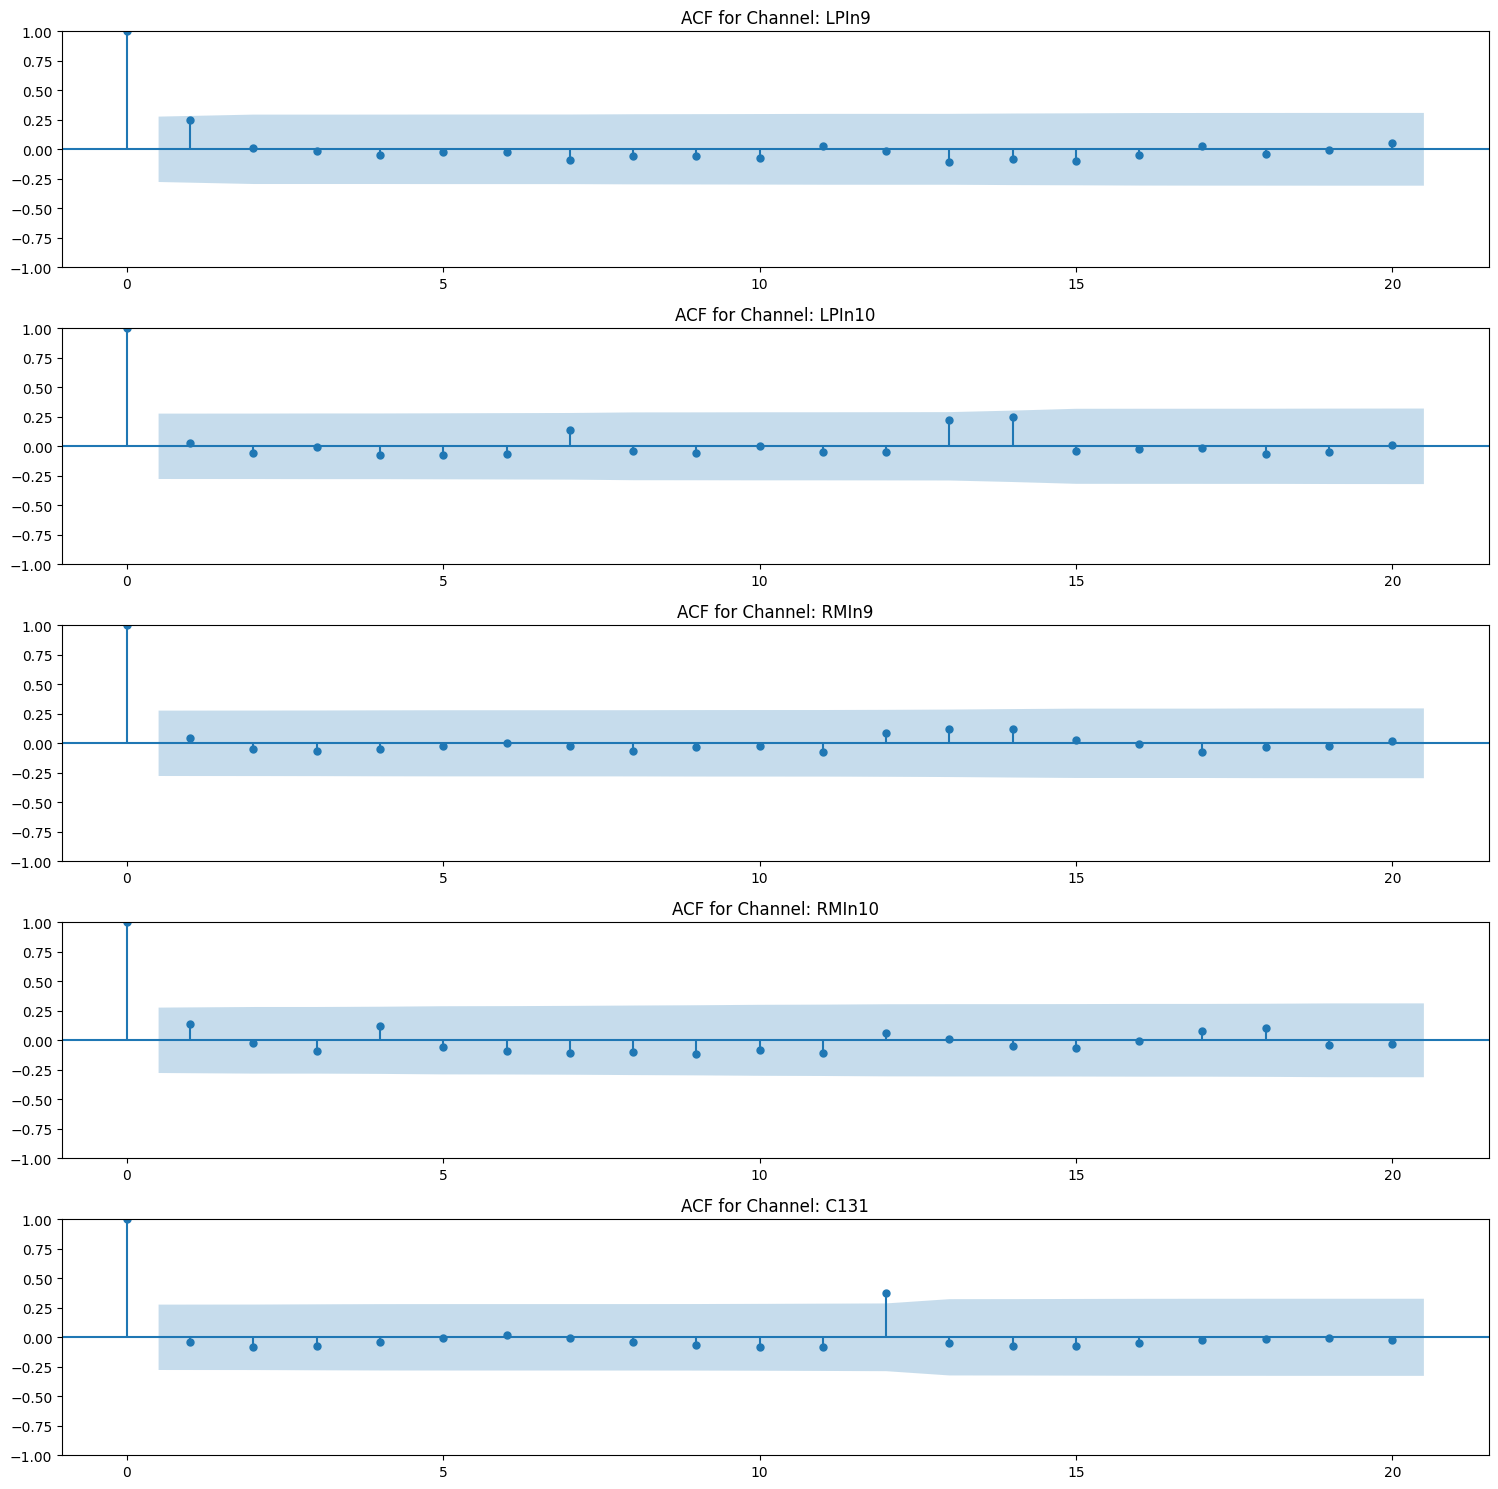

In [8]:
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

# Assuming truncated_rr_intervals stores the truncated R-R intervals for each channel

# Function to calculate and plot ACF for each channel
def plot_acf_rr_intervals(rr_intervals_dict, lags=20):
    plt.figure(figsize=(15, 15))
    
    # Plot ACF for each channel
    for idx, (channel, rr_intervals) in enumerate(rr_intervals_dict.items()):
        plt.subplot(len(rr_intervals_dict), 1, idx + 1)
        plot_acf(rr_intervals, lags=lags, ax=plt.gca(), title=f'ACF for Channel: {channel}')
    
    plt.tight_layout()
    plt.show()

# Plot ACF for each truncated channel's R-R intervals
plot_acf_rr_intervals(truncated_rr_intervals, lags=20)